# **Nicholas Saunders**
**Astronomy 425  
Homework 2**

**Problem 1**

To solve this problem, I first converted the given $R_{star}$ from meters to Mpc. Then, I found the area of a cross section of the star to determine how much "angular" area it takes up. Then, with the given value for density of $10^{9}$ stars Mpc$^{-3}$, I used the mean free path equation on page 154 of Ryden to determine a distance.

$d=\frac{1}{\rho A}=6.2\times 10^{17}$ Mpc

In [105]:
import numpy as np
import matplotlib.pyplot as pl
from scipy.integrate import odeint
pl.style.use('ggplot')

%matplotlib inline

R_star = 7e8 # in meters
# convert to Mpc
R_star_mpc = R_star / 3.09e22
A_star = np.pi * (R_star_mpc ** 2)

rho = 10 ** 9 # in stars per Mpc
mfp = 1 / (rho * A_star)

print("Distance = %.2e Mpc" % mfp)

Distance = 6.20e+17 Mpc


**Problem 2**

Hubble's measurement of $H_0$ was 500 kms$^{-1}$Mpc$^{-1}$. The value for $H_0$ given in Ryden is 70 $\pm$ 7 kms$^{-1}$Mpc$^{-1}$ (I will use 70 for this problem). First, I will break down the value for $H_0$ into a slope:

$\frac{\Delta v}{\Delta x} = 70 $kms$^{-1}$Mpc$^{-1}$

I do the same for Hubble's measurement, but with $\Delta x_{H}$ for the change in distance:

$\frac{\Delta v}{\Delta x_{H}} = 500 $kms$^{-1}$Mpc$^{-1}$

Then, I equate the two in order to solve for $\Delta x_{H}$ compared to $\Delta x$:

$7.14(\frac{\Delta v}{\Delta x}) = \frac{\Delta v}{\Delta x_{H}} \rightarrow \Delta x_{H} = \frac{\Delta x}{7.14}$

This indicates that the measurements by Hubble were roughly 7 times smaller than measurements of the same Cepheids today (assuming Hubble's measurement of $\Delta v$ was approximately accurate). For instance, a Cepheid measured at 10 Mpc today would have been measured by Hubble to be 1.4 Mpc away.

This error in measurement resulted in a much higher value of $H_{0}$, and painted an inaccurate picture of the universe. If Hubble's measurements were accurate, however, it would mean that the universe is much younger than we currently suspect, given the age of the universe can be derived by $t_0 = \frac{1}{H_0)$. For $H_0 = 500 kms$^{-1}$Mpc$^{-1}$:

$t_0 = \frac{1}{500{km s}^{-1}{Mpc}^{-1}}=\frac{1}{1.62x10^{-17}}=6.17x10^{16}s \approx 1.9 Gyr$

which is only a fraction of the actual age of the universe.

**Problem 3**

First, define a small segment of length along the surface of a sphere, called ds:

$ds^2=dr^2+R^2sin^2(\frac{r}{R})(d\theta^2+sin{\theta}d\phi^2)$

$d\phi=0$

$ds^2=dr^2+R^2sin^2(\frac{r}{R})d\theta^2$

To learn more about the angular width, $d\theta$, solve for it:

$ds^2-dr^2=R^2sin^2(\frac{r}{R})d\theta^2 \rightarrow d\theta^2=\frac{ds^2-dr^2}{R^2sin^2{\frac{r}{R}}} \rightarrow d\theta=\frac{\sqrt{ds^2-dr^2}}{Rsin{\frac{r}{R}}}$

For this definition of $d\theta$, as $r \rightarrow \pi R$, the denominator approaches zero and the function approaches infinity, which is the maximum angular seperation.

**Problem 4**

$\dot{a}^2=H_{0}^{2}a^{-3} \rightarrow \dot{a}=H_0 a^{-3/2}$

This can be defined as a function in python.

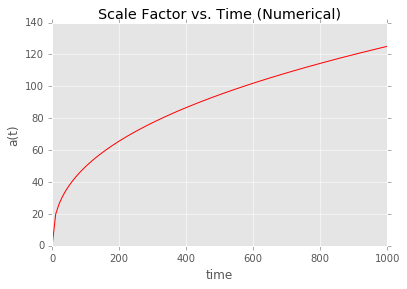

In [120]:
t = np.linspace(0,1000,100)
h_0 = 70
a = 1

def a_dot(a, t):
    return h_0 * (a ** (-3/2))

a_num = odeint(a_dot, a, t)

pl.xlabel("time")
pl.ylabel("a(t)")
pl.title("Scale Factor vs. Time (Numerical)")
pl.plot(t,a_num,'r');

$\dot{a}(t)^{2} = H_{0}^{2}a(t)^{-3} \rightarrow\frac{da(t)}{dt} = H_{0}a(t)^{-3/2} \rightarrow a^{3/2}da = H_{o}dt$

$\int_{o}^{a} a^{3/2}da = \int_{o}^{t} H_{o}dt \rightarrow[\frac{2}{5}a^{5/2}]_{0}^{a} = [H_{0}t]_{o}^{t} \rightarrow a(t) = (\frac{5}{2}H_{o}t)^{2/5}$

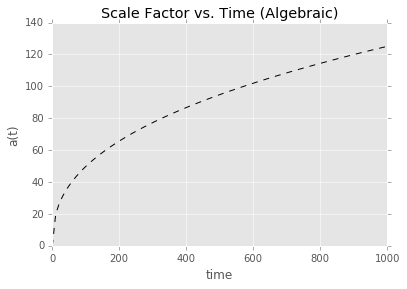

In [127]:
def a_alg(t):
    return ((5/2)*(h_0*t))**(2/5)

pl.xlabel("time")
pl.ylabel("a(t)")
pl.title("Scale Factor vs. Time (Algebraic)")
pl.plot(t, a_alg(t),'k--');

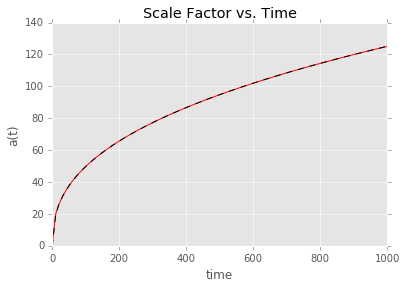

In [128]:
pl.xlabel("time")
pl.ylabel("a(t)")
pl.title("Scale Factor vs. Time")
pl.plot(t,a_num,'r');
pl.plot(t, a_alg(t),'k--');